In [1]:
import sys
sys.path.append('..')
from tests import get_example_model

model=get_example_model('rain')

In [2]:
from pgmpy.inference import VariableElimination
from inference import GibbsSampling
import numpy as np

inference = VariableElimination(model)
gibbs = GibbsSampling(model)

In [3]:
N=[1_000,2_500,10_000,100_000,500_000,1_000_000]
error=[]
query={'variables':[
        'cloudy',
        'rain',
        ],
    'evidence':{
        'sprinkler':1,
        'wet grass':1,
        }}

def norm2(v):
    return np.sqrt(np.sum(v**2))

In [4]:
import time

for n in N:
    start=time.time()
    qi=inference.query(**(query))
    qg=gibbs.query(**(query),N=n)
    error.append(norm2(qg.get_nparray()-qi.values.reshape(-1)))
    print(f"inference computed for {n} interations [{time.time()-start:.4f} seconds]")

inference computed for 1000 interations [0.5575 seconds]
inference computed for 2500 interations [1.3609 seconds]
inference computed for 10000 interations [5.7282 seconds]
inference computed for 100000 interations [55.9252 seconds]
inference computed for 500000 interations [277.2200 seconds]
inference computed for 1000000 interations [555.4147 seconds]


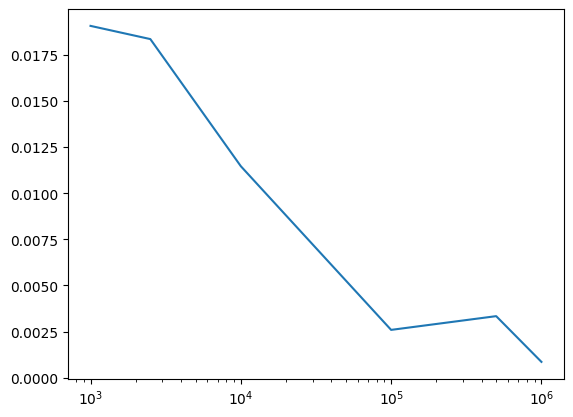

[0.019061726032994407, 0.018346305890015555, 0.011459836209950128, 0.00259308640264229, 0.0033372896669816242, 0.0008598744645609844]


In [5]:
import matplotlib.pyplot as plt

plt.plot(N,error)
plt.xscale('log')
plt.show()
print(error)